To do
- Look into saving/loading data using Parquet
- ~~Add column for track/shower expectation~~
- Write code to drop certain columns

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy.stats as st
from utils import column_renamer, pdgid_converter, is_shower, count_occurrences

In [14]:
filenames = ["neutrino11x.h5", "neutrino12x.h5", "neutrino13x.h5"]
filepaths = [os.path.join("data", filename) for filename in filenames]

df_list = []
for filepath in filepaths:
    df_list.append(pd.read_hdf(filepath))
dataframe = pd.concat(df_list)

dataframe.rename(column_renamer, axis="columns", inplace=True)
dataframe["Particle name"] = dataframe.apply(lambda row: pdgid_converter(row["pdgid"]), axis=1)
dataframe["Is shower?"] = dataframe.apply(is_shower, axis=1)

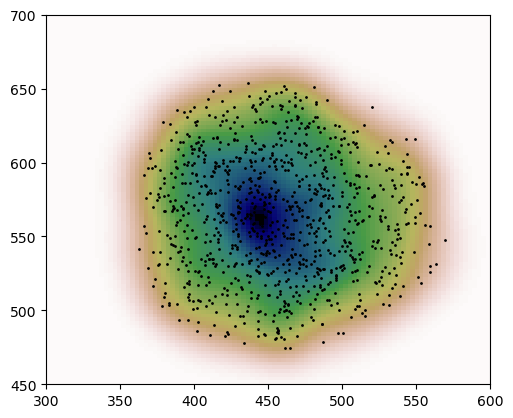

<Figure size 640x480 with 0 Axes>

In [15]:
x = dataframe[0:1000]["Track x-position"]
y = dataframe[0:1000]["Track y-position"]
xmin, xmax = 300, 600
ymin, ymax = 450, 700

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
ax.plot(x, y, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

C:\Users\timho\AppData\Local\Temp\ipykernel_19152\2924348719.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


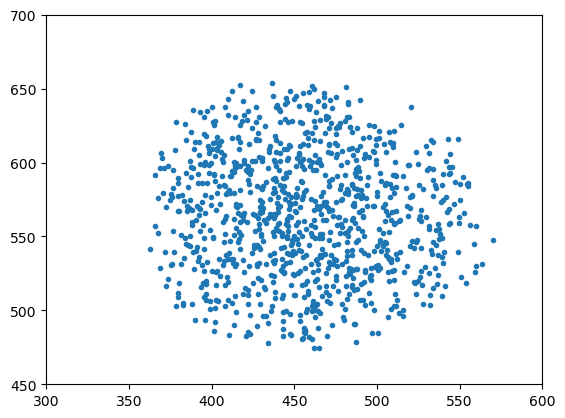

In [3]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(dataframe["Track x-position"], dataframe["Track y-position"], marker=".")
ax.axis(xmin = 300, xmax = 600, ymin= 450, ymax = 700)
fig.show()

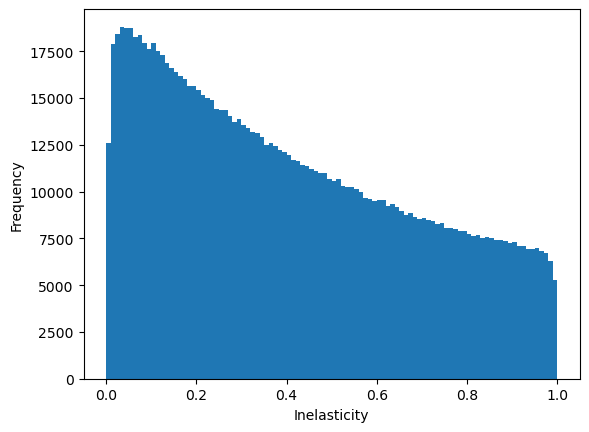

In [6]:
dataframe['Inelasticity'].plot.hist(bins=100, xlabel='Inelasticity')
plt.show()

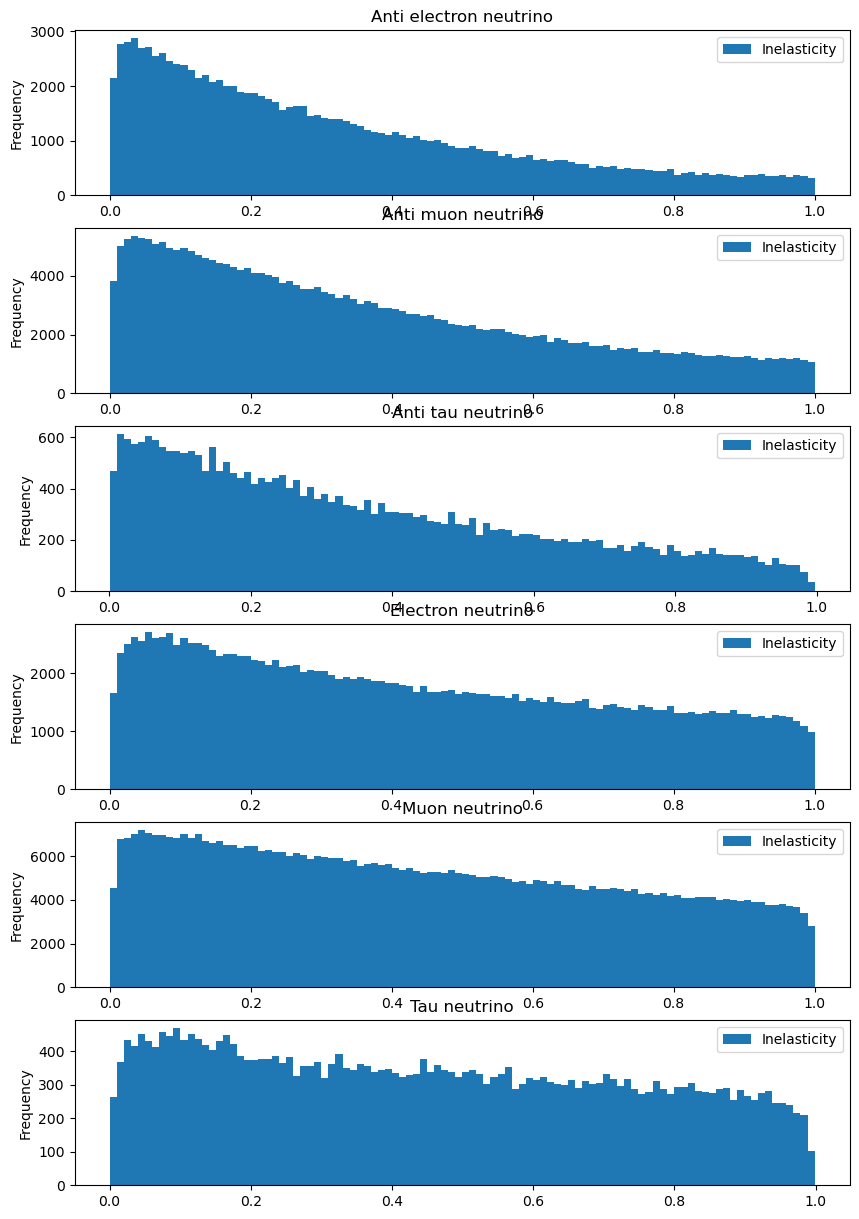

In [10]:
dataframe[['Inelasticity','Particle name']].plot.hist(by='Particle name',bins=100,figsize=(10, 15))
pass
#plt.show()